In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
file_path = 'C:\\Users\\monam\\OneDrive\\Desktop\\testtTR1.csv'
data = pd.read_csv(file_path)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Load the dataset
file_path = 'C:\\Users\\monam\\OneDrive\\Desktop\\testtTR1.csv'
data = pd.read_csv(file_path)

In [3]:
attitude_columns = ['IMP_1', 'IMP_2', 'EXP_1', 'EXP_2']
data['attitude_score'] = data[attitude_columns].sum(axis=1)

In [4]:
categorical_columns = ['AGE', 'GEN', 'DIS', 'EDU', 'HHI', 'CWS']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

In [5]:
X = data.drop('TR1', axis=1)  # Independent variables
y = data['TR1']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['AGE', 'GEN', 'DIS', 'EDU',
                                                   'HHI', 'CWS'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [7]:
y_pred = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.55      0.74      0.63        42
           2       0.43      0.22      0.29        27
           3       0.22      0.06      0.10        32
           4       0.00      0.00      0.00        16
           5       0.80      0.95      0.87       198

    accuracy                           0.72       315
   macro avg       0.40      0.40      0.38       315
weighted avg       0.64      0.72      0.67       315

[[ 31   1   2   0   8]
 [  8   6   3   0  10]
 [  5   5   2   0  20]
 [  4   1   2   0   9]
 [  8   1   0   0 189]]


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
def combine_classes(x):
    if x in [2, 3, 4]:
        return 2  # Merging classes 2, 3, and 4
    else:
        return x

# Apply the function to the target variable
data['TR1_combined'] = data['TR1'].apply(combine_classes)

In [9]:
# Update the target variable
y_combined = data['TR1_combined']

# Splitting the updated dataset
X_train, X_test, y_train_combined, y_test_combined = train_test_split(X, y_combined, test_size=0.3, random_state=42)

# Training the model with the combined classes
rf_pipeline.fit(X_train, y_train_combined)

# Evaluating the model
y_pred_combined = rf_pipeline.predict(X_test)
print(classification_report(y_test_combined, y_pred_combined))
print(confusion_matrix(y_test_combined, y_pred_combined))

              precision    recall  f1-score   support

           1       0.53      0.57      0.55        42
           2       0.70      0.44      0.54        75
           5       0.83      0.94      0.88       198

    accuracy                           0.77       315
   macro avg       0.69      0.65      0.66       315
weighted avg       0.76      0.77      0.76       315

[[ 24  11   7]
 [ 12  33  30]
 [  9   3 186]]


In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [4, 6, 8, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train_combined)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
278 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\monam\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator

Best parameters: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


In [11]:
# Update the Random Forest classifier in the pipeline with the best parameters
rf_optimized_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        max_depth=10, 
        max_features='sqrt', 
        min_samples_leaf=1, 
        min_samples_split=5, 
        n_estimators=100, 
        random_state=42))
])

# Training the optimized model
rf_optimized_pipeline.fit(X_train, y_train_combined)

# Evaluating the optimized model
y_pred_optimized = rf_optimized_pipeline.predict(X_test)
print(classification_report(y_test_combined, y_pred_optimized))
print(confusion_matrix(y_test_combined, y_pred_optimized))

              precision    recall  f1-score   support

           1       0.53      0.62      0.57        42
           2       0.75      0.40      0.52        75
           5       0.82      0.94      0.88       198

    accuracy                           0.77       315
   macro avg       0.70      0.65      0.66       315
weighted avg       0.77      0.77      0.75       315

[[ 26   7   9]
 [ 14  30  31]
 [  9   3 186]]


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gb_pipeline.fit(X_train, y_train_combined)
y_pred_gb = gb_pipeline.predict(X_test)
print(classification_report(y_test_combined, y_pred_gb))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50        42
           2       0.68      0.48      0.56        75
           5       0.85      0.94      0.89       198

    accuracy                           0.77       315
   macro avg       0.67      0.64      0.65       315
weighted avg       0.76      0.77      0.76       315



In [13]:
# After fitting a model, you can check feature importances
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Match feature importances with column names
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names)

# Sort and visualize
sorted_importances = feature_importances.sort_values(ascending=False)
sorted_importances.plot(kind='bar', figsize=(15, 7))

ValueError: Length of values (83) does not match length of index (45)

In [14]:
# Fit the preprocessor to the training data
preprocessor.fit(X_train)

# Get the feature names for one-hot encoded features
one_hot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine with the original feature names for non-categorical features
non_categorical_features = [col for col in X_train.columns if col not in categorical_columns]
all_feature_names = np.concatenate((one_hot_feature_names, non_categorical_features), axis=0)

# Now use these names for your feature importances
feature_importances = pd.Series(importances, index=all_feature_names)

# Sort and visualize
sorted_importances = feature_importances.sort_values(ascending=False)
sorted_importances.plot(kind='bar', figsize=(15, 7))

NameError: name 'np' is not defined

<Axes: >

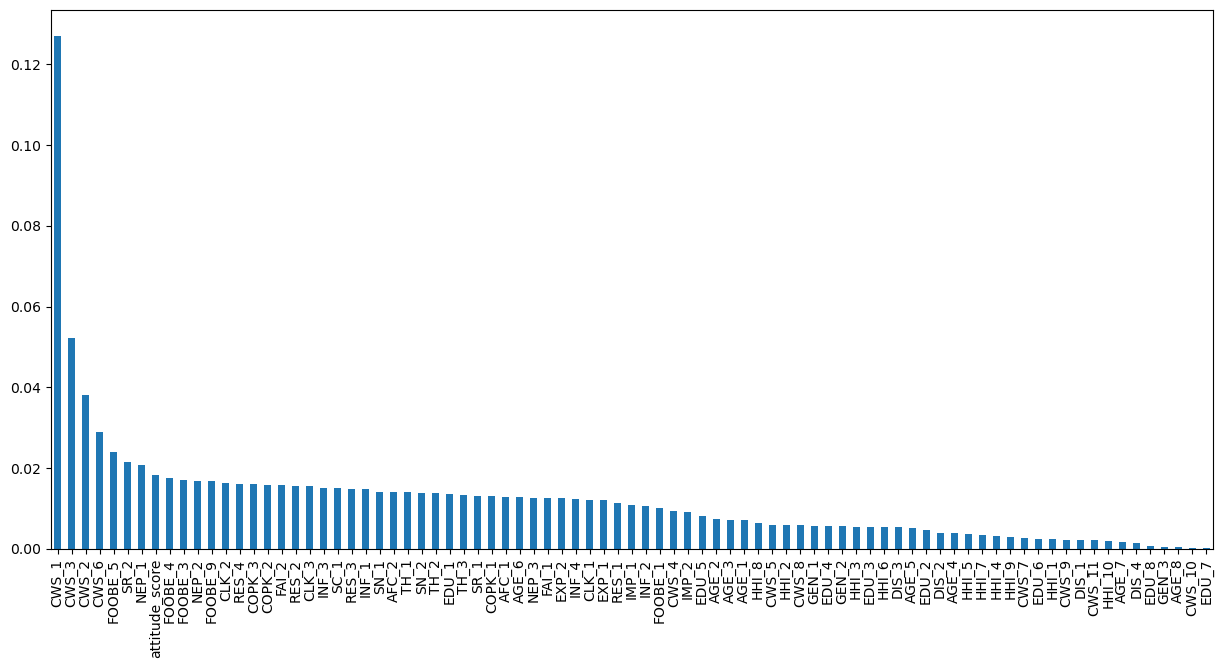

In [15]:
import numpy as np
import numpy as np
import pandas as pd

# Assuming you have already defined 'preprocessor' and 'categorical_columns'
# and have a trained model 'rf_pipeline'

# Fit the preprocessor to the training data
preprocessor.fit(X_train)

# Get the feature names for one-hot encoded features
one_hot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine with the original feature names for non-categorical features
non_categorical_features = [col for col in X_train.columns if col not in categorical_columns]
all_feature_names = np.concatenate((one_hot_feature_names, non_categorical_features), axis=0)

# Retrieve the feature importances from the trained model
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Now use these names for your feature importances
feature_importances = pd.Series(importances, index=all_feature_names)

# Sort and visualize
sorted_importances = feature_importances.sort_values(ascending=False)
sorted_importances.plot(kind='bar', figsize=(15, 7))

In [16]:
# Assuming you have already defined 'feature_importances'
threshold = 0.01
important_features = feature_importances[feature_importances > threshold].index.tolist()

In [17]:
# Select only important features for X
X_important = X[important_features]

# Split the updated dataset into training and testing sets
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_important, y_combined, test_size=0.3, random_state=42
)

KeyError: "['AGE_6', 'EDU_1', 'CWS_1', 'CWS_2', 'CWS_3', 'CWS_6'] not in index"

In [18]:
# Fit the preprocessor and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Get feature names from the preprocessor
one_hot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
non_categorical_features = [col for col in X_train.columns if col not in categorical_columns]
all_feature_names = np.concatenate((one_hot_feature_names, non_categorical_features), axis=0)

In [19]:
# Now select the most important features using the transformed dataset
important_features_indices = np.where(feature_importances > threshold)[0]  # Get indices of important features
important_transformed_features = all_feature_names[important_features_indices]

In [20]:
# Create a boolean mask for the columns to keep in the transformed data
mask = np.zeros(len(all_feature_names), dtype=bool)
mask[important_features_indices] = True

# Apply the mask to the transformed dataset to keep only important features
X_train_important = X_train_transformed[:, mask]
X_test_important = preprocessor.transform(X_test)[:, mask]

In [21]:
# Import necessary libraries for model training and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Split the updated dataset into training and testing sets
# Assuming you have already created X_train_important and X_test_important from the previous steps
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_train_important, y_combined, test_size=0.3, random_state=42
)

# Define the parameter grid for RandomForestClassifier
param_grid_imp = {
    'max_depth': [6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 150]
}

# Initialize the RandomForestClassifier
rf_classifier_imp = RandomForestClassifier(random_state=42)

# Grid search with cross-validation for the RandomForestClassifier
grid_search_imp = GridSearchCV(rf_classifier_imp, param_grid_imp, cv=5, n_jobs=-1, verbose=2)
grid_search_imp.fit(X_train_imp, y_train_imp)

# Best parameters for the new model
print("Best parameters for the reduced feature set:", grid_search_imp.best_params_)

# Predicting on the test set with the optimized model
y_pred_imp = grid_search_imp.predict(X_test_imp)

# Evaluating the model
print(classification_report(y_test_imp, y_pred_imp))
print(confusion_matrix(y_test_imp, y_pred_imp))

ValueError: Found input variables with inconsistent numbers of samples: [735, 1050]

In [22]:
# Re-import necessary library for the split
from sklearn.model_selection import train_test_split

# Make sure to split the target variable using the same test_size and random_state as before
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_train_important,  # this should be the array with only the important features
    y_combined,  # this is your target variable
    test_size=0.3,
    random_state=42
)

# Now, proceed with the GridSearchCV as previously described

ValueError: Found input variables with inconsistent numbers of samples: [735, 1050]

In [23]:
from sklearn.model_selection import train_test_split

# Assuming 'X_train_important' is your feature set after preprocessing and feature selection
# And 'y_combined' is your target variable before any splitting

# Split both the features and target variable together to ensure they align
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_train_important, y_combined, test_size=0.3, random_state=42
)

# Now the number of samples in X_train_imp and y_train_imp should match

ValueError: Found input variables with inconsistent numbers of samples: [735, 1050]

In [24]:
print(X_train_important.shape)
print(y_combined.shape)

(735, 44)
(1050,)


In [25]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_train_important,  # make sure this is the correct variable for features
    y_combined,         # make sure this is the correct variable for the target
    test_size=0.3,
    random_state=42
)

ValueError: Found input variables with inconsistent numbers of samples: [735, 1050]